<h1 style="font-size: 24px; text-align: center; color:blue;"><b> Unsupervised Machine Learning : Clustering<br>Assignment-5</b></h1>

### Objective:
The objective of this assessment is to evaluate your understanding and ability to apply clustering techniques to a real-world dataset.



### Dataset
Use the Iris dataset available in the sklearn library.


In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')

### 1. Loading and Preprocessing 


In [115]:
iris=load_iris()
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [117]:
df['Target']=iris.target

In [119]:
df['Target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int32

In [121]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [123]:
df.shape

(150, 5)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [31]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [127]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
dtype: int64

In [129]:
df.duplicated().sum()

1

In [131]:
df.drop_duplicates(inplace=True)

In [133]:
df.duplicated().sum()

0

#### Drop the species column since this is a clustering problem.

Here species is classified in target column, So it is removing. As clustering is an unsupervised model there is no need of target column.

In [137]:
df.drop(columns='Target', inplace=True)


In [139]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [76]:
correlation_matrix=df.corr()

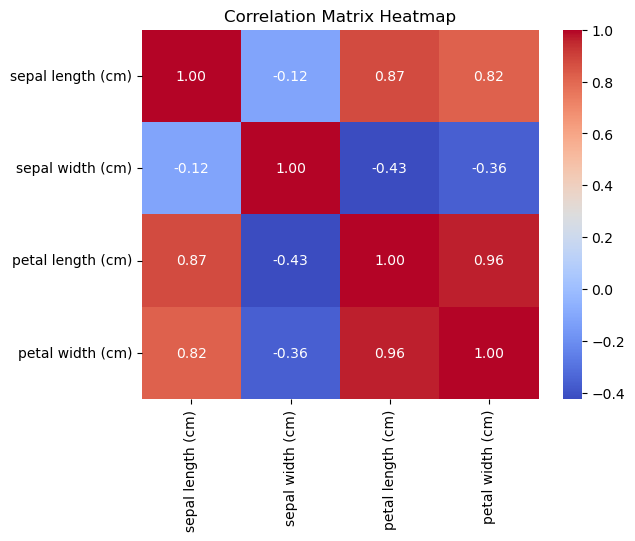

In [141]:
# Plot the heatmap
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

### 2.Clustering Algorithm Implementation

#### A) KMeans Clustering 
K-Means is an unsupervised machine learning algorithm used to group data into a specified number of clusters (k). The process works as follows:

* Initialization: Randomly select k points as initial cluster centroids.
* Assignment: Assign each data point to the nearest centroid based on a distance metric (e.g., Euclidean distance).
* Update: Recalculate the centroids by averaging the data points assigned to each cluster.
* Repeat: Iterate steps 2 and 3 until the centroids stabilize (i.e., no significant change in their positions) or a maximum number of iterations is reached.
* Output: The algorithm outputs cluster assignments and the final centroid positions.
* K-Means works best with numerical data and assumes clusters are spherical and evenly sized. It may require preprocessing (e.g., scaling) for optimal results.

Why KMeans clustering might be suitable for the Iris dataset?

K-Means clustering is suitable for the Iris dataset because it is an unsupervised algorithm that can effectively group data points based on their features, and the Iris dataset contains well-defined numerical features (sepal length, sepal width, petal length, and petal width). These features provide clear separations between species in a multi-dimensional space, making it ideal for K-Means, which works by minimizing intra-cluster distances. Additionally, the Iris dataset is small, balanced, and has roughly spherical clusters, aligning well with the assumptions of K-Means. This allows the algorithm to group the data into three clusters that can correspond to the three species (setosa, versicolor, virginica) without relying on labeled data.









#### Apply KMeans clustering to the preprocessed Iris dataset and visualize the clusters.

##### First feature scaling is doing for leading to biased clustering results.

In [155]:
dfc=df.copy()

In [159]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dfc)
X=pd.DataFrame(scaled_data)

In [282]:
X.head()

,0,1,2,3,cluster
0,-0.898033,1.012401,-1.333255,-1.308624,1
1,-1.139562,-0.137353,-1.333255,-1.308624,1
2,-1.381091,0.322549,-1.390014,-1.308624,1
3,-1.501855,0.092598,-1.276496,-1.308624,1
4,-1.018798,1.242352,-1.333255,-1.308624,1


#### Elbow method :

The Elbow Method is a technique used in KMeans clustering to determine the optimal number of clusters (K) for a dataset. It works by plotting the within-cluster sum of squares (WCSS) against different values of K and looking for the "elbow point" in the graph. The elbow point is where the rate of decrease in WCSS slows significantly, indicating that adding more clusters does not provide substantial improvement in clustering performance. This optimal K balances model simplicity and accuracy, avoiding both underfitting and overfitting.

In [161]:
#Using Elbow method
inertia_values=[]
k=range(1,10)
for i in k:
    m=KMeans(n_clusters=i)
    m.fit(X)
    inertia_values.append(m.inertia_)

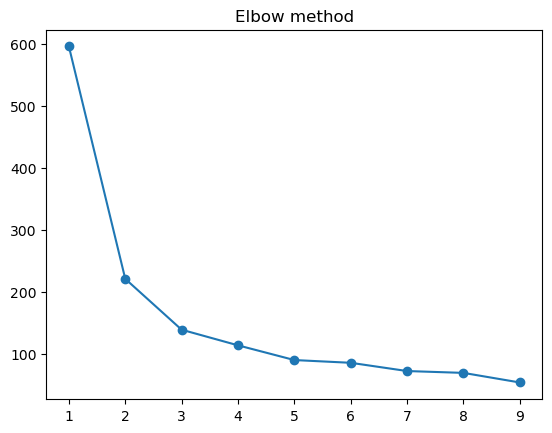

In [163]:
plt.plot(k,inertia_values,marker='o')
plt.title('Elbow method')
plt.show()

<font color=green size=4>From this taking K=4 as optimal clustering size.

In [167]:
k=6
kmeans=KMeans(n_clusters=6,random_state=42)
X['Cluster']=kmeans.fit_predict(X)
X.head()

,0,1,2,3,Cluster
0,-0.898033,1.012401,-1.333255,-1.308624,5
1,-1.139562,-0.137353,-1.333255,-1.308624,1
2,-1.381091,0.322549,-1.390014,-1.308624,1
3,-1.501855,0.092598,-1.276496,-1.308624,1
4,-1.018798,1.242352,-1.333255,-1.308624,5


<font color=green size=4>Clusters are formed

#### Using PCA (Dimensionality reduction) for ploting a better clustered scatter plot.


In [173]:
# Assuming `X` is your DataFrame or scaled data
if isinstance(X, pd.DataFrame):
    X.columns = X.columns.astype(str)  # Ensure column names are strings

# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0  3.144138 -1.500925
1 -0.901081 -2.394621
2 -0.714896 -2.622701
3 -0.822685 -2.596003
4  3.232918 -1.599075


#### Plotting

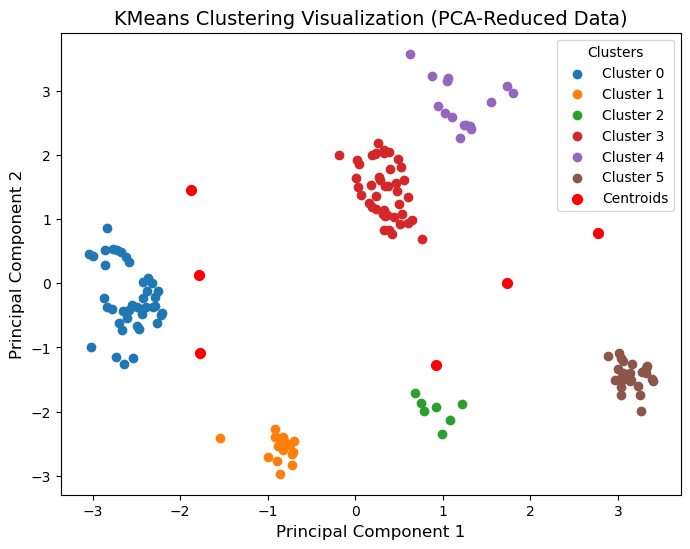

In [185]:
import matplotlib.pyplot as plt

# Assuming `pca_df` is your DataFrame containing PC1, PC2, and cluster labels
pca_df['Cluster'] = X['Cluster']  # Add cluster labels to pca_df

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in sorted(pca_df['Cluster'].unique()):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

# Adding cluster centers
cluster_centers = kmeans.cluster_centers_
cluster_centers_pca = PCA(n_components=2).fit_transform(cluster_centers)  # Transform cluster centers using PCA
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], 
            c='red', marker='o', s=50, label='Centroids')

# Customizing the plot
plt.title('KMeans Clustering Visualization (PCA-Reduced Data)', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Clusters')
plt.show()


### B) Hierarchical Clustering

Hierarchical clustering is a clustering technique that groups data points into a hierarchy of clusters. It operates either in a divisive (top-down) or agglomerative (bottom-up) manner. Agglomerative clustering starts with each data point as its own cluster and iteratively merges the closest clusters based on a distance metric (e.g., Euclidean) until all points form a single cluster. Divisive clustering does the reverse, splitting one large cluster into smaller clusters. The results are visualized using a dendrogram, which shows the merging or splitting process and helps determine the optimal number of clusters by cutting the dendrogram at a specific level. Hierarchical clustering is particularly useful for understanding nested cluster relationships.

#### Why Hierarchical Clustering for Iris dataset?
Hierarchical clustering is important in the Iris dataset as it helps uncover natural groupings of the three flower species (Setosa, Versicolor, Virginica) without requiring predefined labels. It provides a dendrogram that visually represents the clustering process, offering insights into how data points and species are related at different levels. By leveraging distance-based metrics, hierarchical clustering identifies patterns in the petal and sepal measurements, making it a powerful tool for exploratory data analysis and understanding the dataset’s structure.

In [244]:
dfc.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [246]:
#  Create a linkage matrix using scipy's linkage function
Z = linkage(dfc, method='ward')  # 'ward' minimizes variance within clusters


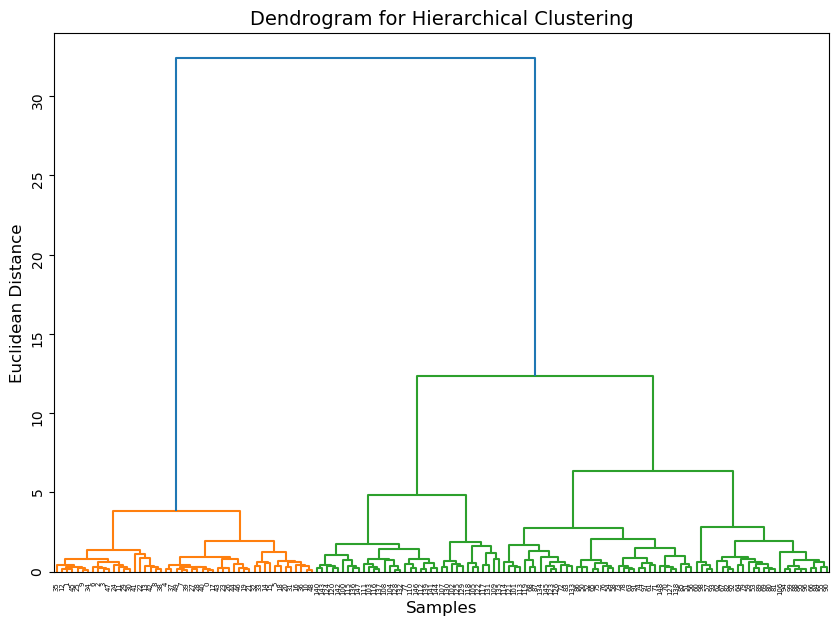

In [248]:
# Step 3: Plot the dendrogram to visualize the hierarchy
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage (dfc, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering', fontsize=14)
plt.xlabel('Samples', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.yticks(rotation=90)
plt.show()


In [250]:
uniquecolors = set(dend["color_list"])
uniquecolors

{'C0', 'C1', 'C2'}

In [268]:
optimal_number_of_clusters = len(uniquecolors)-1
optimal_number_of_clusters

2

In [272]:
clusters = AgglomerativeClustering(n_clusters = optimal_number_of_clusters, metric="euclidean", linkage="ward")
clusters.fit_predict(dfc)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [276]:
dfc['cluster']=clusters.fit_predict(dfc)
dfc

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


#### Plot using Agglomerative clustering

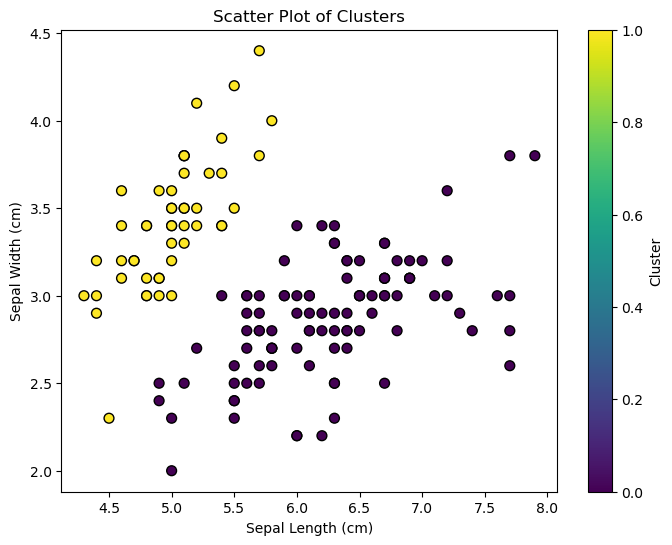

In [286]:
# Extracting features and clusters
x = dfc['sepal length (cm)']  # Choose one feature for x-axis
y = dfc['sepal width (cm)']   # Choose another feature for y-axis
clusters = dfc['cluster']     # Cluster assignments

# Scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=clusters, cmap='viridis', s=50, edgecolor='k')

# Adding labels and title
plt.title('Scatter Plot of Clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.colorbar(scatter, label='Cluster')  # Add colorbar to show cluster mapping
plt.show()